# _automaton_.lightest(_num_=1, _algo_="auto")

Return a (finite) approximation of the behavior of the automaton.  In other words, compute the polynomial of the lightest accepted words (the shortlex order is used to sort words of equal weights), and their associated weight.

Arguments:
- `num` the number of words to find (there might be fewer, see Notes).
- `algo` the algorithm name.

The algorithm can be:
- `"breadth-first"`: uses the same algorithm as for the search of multiple words.
- `"yen"`: uses Yen's algorithm to retrieve multiple paths, the algorithm does not count loops as possible paths.
- `"eppstein"`: uses Eppstein's algorithm to retrieve multiple paths on any automata.
- `"auto"`: Same as `"breadth-first"` for any k different from 1 (see [lightest_automaton](automaton.lightest_automaton.ipynb) otherwise).
- The different implementations of lightest path (see [lightest_automaton](automaton.lightest_automaton.ipynb)): if num is different from one it will use the default implementation of lightest.
    - `"auto"`
    - `"a-star"`
    - `"bellman-ford"`
    - `"dijkstra"`

Notes:
- Lightest computations find lightest paths in the automaton by selecting the K lightest accepting sequences of states in the automaton, regardless of the accepting words. These paths might add up in the resulting polynomial if they represent the same word. Hence, resulting in fewer results than expected. Consider for instance a naive automaton for `<+1>a + <-1>a`: it would find `<-1>a` although `a` is not accepted. This problem will not happen if the automaton is unambiguous, a property that can be verified using [_automaton_.is_ambiguous](automaton.is_ambiguous.ipynb).

Preconditions:
- None

See also:
- [_automaton_.shortest](automaton.shortest.ipynb)
- [_automaton_.lightest_automaton](automaton.lightest_automaton.ipynb)
- [Sms2fr](Sms2fr.ipynb) - Translate SMS (i.e., text messages) to proper French.
- [_automaton_.is_ambiguous](automaton.is_ambiguous.ipynb)

## Examples

In [1]:
import vcsn

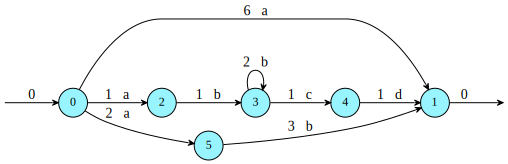

In [2]:
%%automaton --strip a
context = "lal, nmin"
$ -> 0
0 -> 1 <6>a
0 -> 2 <1>a
2 -> 3 <1>b
3 -> 3 <2>b
3 -> 4 <1>c
4 -> 1 <1>d
0 -> 5 <2>a
5 -> 1 <3>b
1 -> $

In [3]:
a.lightest()

<4>abcd

Note that polynomials are printed in shortlex order, i.e., an order based on the labels, although here, a weight-based order would make more sense.

In [4]:
a.lightest(2)

<5>ab + <4>abcd

In [5]:
a.lightest(10)

<6>a + <5>ab + <4>abcd + <6>abbcd + <8>abbbcd + <10>abbbbcd + <12>abbbbbcd + <14>abbbbbbcd + <16>abbbbbbbcd + <18>abbbbbbbbcd

Other algorithms can be called by specifying a second argument to the function.

Note that Yen's algorithm requires the automaton to have no cycles, as demonstrated here.

In [6]:
a.lightest(10, "yen")

<6>a + <5>ab + <4>abcd

In [7]:
a.lightest(10, "eppstein")

<6>a + <5>ab + <4>abcd + <6>abbcd + <8>abbbcd + <10>abbbbcd + <12>abbbbbcd + <14>abbbbbbcd + <16>abbbbbbbcd + <18>abbbbbbbbcd